<a href="https://colab.research.google.com/github/ebatty/IntroCompNeuro/blob/main/lectures/MathReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review of relevant math

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 

# Section 1: Linear algebra



## Section 1.1: Vector operations

We have several mathematical operations we perform on or with vectors. **Scalar multiplication** of a vector changes its length but not its direction (except for sometimes reversing by 180 degrees as we'll see in the next demo). When we multiply a vector, $\bar{x}$,  by a scalar, $a$, we multiply each individual component by the scalar:

$$ a\bar{x} = \begin{bmatrix}
    a\bar{x}_1 \\ a\bar{x}_2 \\ \vdots \\ a\bar{x}_N
\end{bmatrix}$$

You can visualize **vector addition** as the stacking of the two arrows head to tail. In essence, you are moving the second vector so its base is at the tip of the first, without changing its direction. The tip of this stacked second vector is the new added vector's tip. In order words, if you visualize two vectors as sides of a parallelogram, adding them will create a vector with the 4th vertex of that parallelogram as its tip. Numerically, this means that we add the corresponding components of each vector:


 $$\bar{x} + \bar{y} = \begin{bmatrix}
           \bar{x}_{1} + \bar{y}_1 \\ \bar{x}_{2} + \bar{y}_2\\ \vdots \\ \bar{x}_{N} + \bar{y}_N 
\end{bmatrix}$$


We call a group of 2 or more vectors a **set of vectors**. A **linear combination** of a set of vectors is a combination of the set using scalar multiplication and vector addition. Essentially, we are multiplying each vector in the set by a scalar and then adding all the scalar multiplied vectors together: the output of this (another vector) is a linear combination of the set. More formally defined, a vector, $\bar{u}$, is a linear combination of a set of vectors $\bar{v}^1, \bar{v}^2, ..., \bar{v}^N$ with (scalar) weights $c_1, c_2, ...c_N$ if:

\begin{align}
\bar{u} = c_1\bar{v}^1 + c_2\bar{v}^2 + ... + c_n\bar{v}^N
\end{align}.

In the following demo, we will demonstrate a linear combination of two vectors, $\bar{x}$ and $\bar{y}$. 

$$\bar{z} = a\bar{x} + b\bar{y}$$

where $\bar{x} = \begin{bmatrix}3 \\ 1 \\\end{bmatrix}$ and $\bar{y} = \begin{bmatrix}-1 \\ 2 \\\end{bmatrix}$. You can change what a and b equal.

In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.

def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\bar{x}$", r"$\bar{y}$", r"$a\bar{x}$", r"$b\bar{y}$", r"$\bar{z} = a\bar{x} + b\bar{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

## Section 1.2: Span & linear independence

The **span of a set of vectors** is the set of all possible linear combinations of those vectors. In the last demo, you saw that two vectors $\bar{x}$ and the vector $\bar{y}$ that span 2D space (${\rm I\!R}^2$). This means you can get to any point in 2D space (corresponding to vector $\bar{v}$ with some combination of $a$ and $b$, the scalar multiples in a linear combination of $\bar{x}$ and $\bar{y}$:

$$\bar{v} = a\bar{x} + b\bar{y}$$

Even more specifically, in this situation, each point in 2D space is identified by a unique and single combination of $a$ and $b$: if you know the point, you know what $a$ and $b$ are. 

A set of vectors is linearly dependent if one can be written as a linear combination of the others. If this is not the case, the set of vectors is linearly independent.

Let's look at the demo again but with a different $\bar{x}$ and $\bar{y}$.




In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([6, 2])

  plot_arrows(x, y, a*x, b*y)

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

**Stop and think!** In the demo above, what is the span of $\bar{x}$ and $\bar{y}$?

Their span is a 1D line through 2D space - we cannot reach any place in 2D space using a linear combination of $\bar{x}$ and $\bar{y}$

**Stop and think!** In the demo above, what are $\bar{x}$ and $\bar{y}$ linearly independent or dependent?

Linearly dependent as $\bar{y}$ is a scalar multiple of $\bar{x}$

## Section 1.3: Change of basis

Let's say we have a 2D vector, [1, 3]. We are actually defining that vector with respect to the standard basis. The standard basis is: $$\tilde{e}^1 = \begin{bmatrix}1\\ 0\end{bmatrix}, \tilde{e}^2 = \begin{bmatrix}0\\ 1\end{bmatrix} $$

Specifically, we are defining the vector as a linear combination of the two standard basis vectors where the scalars are our coordinates. So, we are defining the vector as 
\begin{align}
\bar{x} &= 1\tilde{e}^1 + 3\tilde{e}^2\\ 
&= 1\begin{bmatrix}1\\ 0\end{bmatrix} + 3\begin{bmatrix}0\\ 1\end{bmatrix}\\
&= \begin{bmatrix}1 \\ 3\end{bmatrix}
\end{align}

<img src="https://raw.githubusercontent.com/ebatty/IntroCompNeuro/main/images/standardbasis.png" width = "300">

This is not the only basis we could use though! Any vectors that span the space and are linearly independent form a basis for that space. 

Let's say we have vectors 

\begin{align}
\bar{v}^1 = \begin{bmatrix}1\\1\end{bmatrix}, \bar{v}^2 = \begin{bmatrix}-1\\1\end{bmatrix}\end{align}
, as pictured below.

<img src="https://raw.githubusercontent.com/ebatty/IntroCompNeuro/main/images/newbasis.png" width = "300">

We could define space with respect to these basis vectors instead. Essentially, we are defining a new grid using these vectors:

<img src="https://raw.githubusercontent.com/ebatty/IntroCompNeuro/main/images/newbasis2.png" width = "300">

We can see that the coordinates of the vector $\bar{x}$ with respect to $\bar{v}^1$ and $\bar{v}^2$ are $\begin{bmatrix}2\\1\end{bmatrix}$. The vector is two units up $\bar{v}^1$ and one unit up $\bar{v}^2$. We could change basis back to our standard basis with:
\begin{align}
\bar{x} &= 2\bar{v}^1 + 1\bar{v}^2\\ 
&= 2\begin{bmatrix}1\\ 1\end{bmatrix} + 1\begin{bmatrix}-1\\ 1\end{bmatrix}\\
&= \begin{bmatrix}1 \\ 3\end{bmatrix}
\end{align}

## Section 1.4: More resources on vector basis and basis changes

Video available at https://youtube.com/watch?v=P2LTAUO1TdA


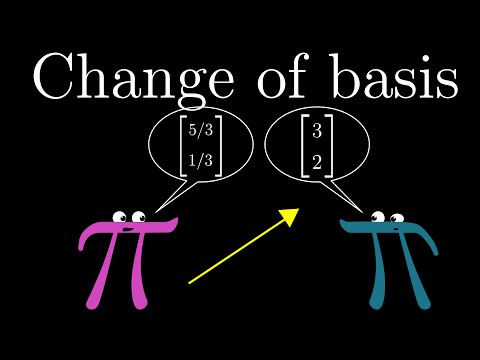

In [ ]:
  # @markdown Execute to see brief video on change of basis
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="P2LTAUO1TdA", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

# Section 2: Dynamical Systems



## Section 2.1: Continuous dynamical systems & different equations

Continuous dynamical systems concern the evolution of variables over time, where the update rules are differential equations.

Let's look at a dynamical system with just one variable. We will look at a population of humans (from https://compneuro.neuromatch.io/tutorials/W0D4_Calculus/student/W0D4_Tutorial2.html#video-2-population-differential-equation). The population changes according to:

$$\frac{d}{dt}p(t) = \alpha p(t) $$

In other words, the change in population is equal to the birth rate ($\alpha$) times the current population.



### Section 2.1.1: Analytical solution

In this case, we can actually solve this differential equation to come up with an equation for $p(t)$ that does not include a derivative:
\begin{align}
p(t) = p(0)e^{\alpha t}
\end{align}

We won't worry about how to come up with analytical solutions for differential equations, but we can prove this is a solution by taking the derivative of it:

\begin{align}
p(t) &= p(0)e^{\alpha t}\\
\frac{d}{dt}p(t) &= \frac{d}{dt}p(0)e^{\alpha t}\\
\frac{d}{dt}p(t) &= p(0)\alpha e^{\alpha t}\\
\frac{d}{dt}p(t) &= \alpha p(0)e^{\alpha t}\\
\frac{d}{dt}p(t) &= \alpha p(t)\\
\end{align}

In this last step, we used the fact that the two terms on the most right side ($p(0)e^{\alpha t}$ are $p(t)$. You can see we found our differential equation so our solution is correct!

### Section 2.1.2: Euler's method

Often, we can't come up with a nice analytical solution to a differential equation, so we have to use Euler's method.

Let's say we have a differential equation of y over time, $\frac{dy}{dt}$ and we know the value of $y$ at time $t_n$. We can approximate the value of y at time $t_{n+1}$ using the derivative. Specifically, the derivative gives the slope of a tangent line at the curve at $y_n$ (that's the definition of a derivative). 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Forward_Euler_method_illustration.png" width = "300">

Remember that the slope can also be computed as rise over run, so we could approximate as

$$\frac{dy}{dt} = \frac{y_{n+1} - y_n}{t_{n+1} - t_n} $$

if the time difference is really small. If we rearrange this equation and use $dt = t_{n+1} - t_n$, we get 

$$y_{n+1} = y_n + \frac{dy(t_n)}{dt}dt $$

We can keep stepping along and approximating the next y value using this equation. Note, it will only be an accurate approximation if dt is small.

Let's look at this for our population equation.

We will use helper code from https://compneuro.neuromatch.io/tutorials/W0D4_Calculus/student/W0D4_Tutorial3.html.

In [ ]:
# @markdown Execute to get helper function `visualize_population_approx`
def visualize_population_approx(t, p):
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, np.exp(0.3*t), 'k', label='Exact Solution')

    plt.plot(t, p,':o', label='Euler Estimate')
    plt.vlines(t, p, np.exp(0.3*t),
              colors='r', linestyles='dashed', label=r'Error $e_k$')

    plt.ylabel('Population (millions)')
    plt.legend()
    plt.xlabel('Time (years)')
    plt.show()


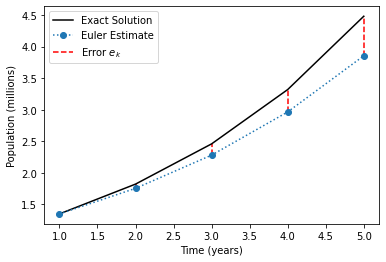

In [ ]:
# Time step
dt = 1

# Make time range from 1 to 5 years with step size dt
t = np.arange(1, 5+dt/2, dt)

# Get number of steps
n = len(t)

# Initialize p array
p = np.zeros(n)
p[0] = np.exp(0.3*t[0]) # initial condition

# Loop over steps
for k in range(n-1):

  # Calculate the population step
  dp_dt = .3 * p[k]
  p[k+1] = p[k] + dt * dp_dt

# Visualize
visualize_population_approx(t, p)

## Section 2.2: Plotting 2D systems of differential equations

TBD

## Section 2.3: Fixed points & stability

Fixed points in continuous dynamical systems occur when all derivatives are equal to 0.

If we have:

\begin{align}
\frac{dx_1}{dt} &= F(x_1, x_2)\\
\frac{dx_2}{dt} &= G(x_1, x_2)
\end{align}

the fixed points would occur at the ($x_1$, $x_2$) pairs where 

\begin{align}
F(x_1, x_2) = 0\\
G(x_1, x_2) = 0
\end{align}

Fixed points can either be **stable** or **unstable**. In both cases, if the system is at the fixed point, it will stay there (because there is no change, the derivatives are equal to 0). If the system starts near a fixed point and goes towards it, that fixed point is stable. If the sytem starts near a fixed point and isn't drawn towards it, that fixed point is unstable.

## Section 2.4: Eigenvalues/eigenvectors in differential equations



### Section 2.4.1: First order differential equations
Let's assume we have two differential equations of the form:
\begin{align}
\frac{dx_1}{dt} &= a_1x_1 + a_2x_2\\
\frac{dx_2}{dt} &= b_1x_1 + b_2x_2
\end{align}

We can write this using matrix-vector notation:

\begin{align}
\frac{d\bar{x}}{dt} = A\bar{x}
\end{align}

where

\begin{align}
A = \begin{bmatrix}a_1 & a_2 \\ b_1 & b_2\end{bmatrix}
\end{align}

This system has one fixed point at (0, 0).

The eigenvalues and eigenvectors of A tell us the stability of this fixed point and what will happen in this system. See below to see what will happen with different eigenvalue options.

In [ ]:
#@markdown Execute this cell to view dynamical systems gif

from IPython.display import Image

Image(url = 'https://github.com/ebatty/MathToolsforNeuroscience/blob/master/dynsysdemo.gif?raw=True', width=700)

### Section 2.4.2: More complex differential equations

Let's say we have more complex differential equations:

\begin{align}
\frac{dx_1}{dt} &= F(x_1, x_2)\\
\frac{dx_2}{dt} &= G(x_1, x_2)
\end{align}

where $F$ and $G$ are some complex functions. This system could have any number of fixed points.

This system is more complicated that the simple case in section 2.4.1, but we can still use the information there. 

First, we need to find the fixed points of this system. It turns out that we can approximate the system near each fixed point as a more simple system:

\begin{align}
\frac{d\bar{x}}{dt} = J\bar{x}
\end{align}
where $J$ is the Jacobian of the system, the matrix of partial derivatives:

$$J = \begin{bmatrix}\frac{dF}{dx_1} & \frac{dF}{dx_2} \\ \frac{dG}{dx_1} & \frac{dG}{dx_2}\end{bmatrix}$$

So, the eigenvalues of the Jacobian at a fixed point tells us the behavior near that fixed point.

## Section 2.5: More resources on differential equations & dynamical systems

Video available at https://youtube.com/watch?v=rSMn_aU_XgA


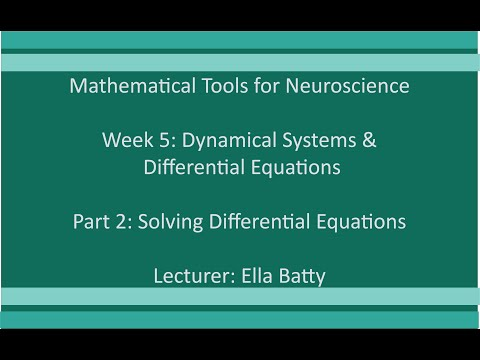

In [ ]:
  # @markdown Execute to see video on 1 differential equation and Euler's method
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="rSMn_aU_XgA", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

Video available at https://youtube.com/watch?v=lV8SoeAxLgM


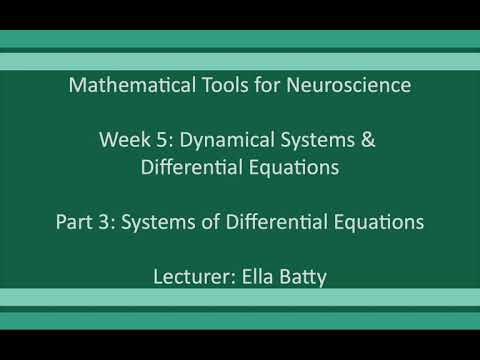

In [ ]:
  # @markdown Execute to see video on systems of differential equations
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="lV8SoeAxLgM", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)